# Тимски проект: Споредба на алгоритмите за предвидување на временски серии

**Dataset:** Rossmann Store Sales  

**Студенти:**  
- Амел Махмутовиќ (203100)  
- Христина Степаноска (183007)  
- Михаела Николовска (183014)


## 1. Вовед и опис на множеството

Предвидувањето на временски серии е важен проблем во многу реални апликации, особено во малопродажбата.
Во овој проект се анализира и споредува однесувањето на различни модели за предвидување на продажба.

Rossmann Store Sales множеството содржи дневни податоци за продажба на повеќе продавници, како и дополнителни информации за промоции, празници и тип на продавница.
Податоците се трансформираат во временска серија преку агрегација на вкупната дневна продажба.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## 2. Вчитување и препроцесирање на податоците

Во оваа секција се вчитуваат податоците и се вршат основни чекори за предпроцесирање, како спојување на табелите, отстранување на денови кога продавниците биле затворени и справување со вредности кои недостасуваат.


In [ ]:
import pandas as pd

base_path = "/content/drive/MyDrive/rossmann_project/data/"


In [ ]:
train = pd.read_csv(base_path + "train.csv", parse_dates=["Date"])
store = pd.read_csv(base_path + "store.csv")


/tmp/ipython-input-2991974737.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(base_path + "train.csv", parse_dates=["Date"])


In [ ]:
df = train.merge(store, on="Store", how="left")


In [ ]:
df.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [ ]:
# ts = df.groupby("Date")["Sales"].sum().reset_index()
# ts = ts.set_index("Date")


In [ ]:
# ts.head()
# ts.info()


✔️ one value per day

✔️ continuous timeline

✔️ clean datetime index

✔️ no missing sales

✔️ exactly what ARIMA / Prophet / ML need

Со агрегацијата добивме една временска серија со 942 дневни набљудувања, што одговара на периодот од 2013 до 2015 година.

In [ ]:
# ts.head()
# ts.tail()


## 3. Експлораторна анализа на податоците (EDA)

EDA се користи за подобро разбирање на временската серија.
Се анализираат трендовите, сезонските повторувања и влијанието на надворешни фактори врз продажбата.


In [ ]:
df.shape
df.info()
df.describe()
df.isna().mean().sort_values(ascending=False).head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

,0
Promo2SinceWeek,0.499436
PromoInterval,0.499436
Promo2SinceYear,0.499436
CompetitionOpenSinceYear,0.317878
CompetitionOpenSinceMonth,0.317878
CompetitionDistance,0.002597
DayOfWeek,0.000000
Store,0.000000
Date,0.000000
Sales,0.000000


In [ ]:
daily = (
    df.groupby("Date", as_index=False)["Sales"]
      .sum()
      .sort_values("Date")
)

daily.head()


,Date,Sales
0,2013-01-01,97235
1,2013-01-02,6949829
2,2013-01-03,6347820
3,2013-01-04,6638954
4,2013-01-05,5951593


По агрегација по датум, добиваме временска серија каде секоја редица ја претставува вкупната дневна продажба на сите Rossmann продавници. Оваа серија ќе ја користиме за визуелизација и моделирање.

In [ ]:
df.info()
df.isna().mean().sort_values(ascending=False).head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

,0
Promo2SinceWeek,0.499436
PromoInterval,0.499436
Promo2SinceYear,0.499436
CompetitionOpenSinceYear,0.317878
CompetitionOpenSinceMonth,0.317878
CompetitionDistance,0.002597
DayOfWeek,0.000000
Store,0.000000
Date,0.000000
Sales,0.000000


In [ ]:
na_frac = df.isna().mean()

summary = pd.DataFrame({
    "non_null_count": df.notna().sum(),
    "missing_fraction": na_frac
}).reset_index().rename(columns={"index": "column"})

summary["missing_percent"] = (summary["missing_fraction"] * 100).round(2).astype(str) + "%"

summary = summary.sort_values("missing_fraction", ascending=False)

summary

,column,non_null_count,missing_fraction,missing_percent
15,Promo2SinceWeek,509178,0.499436,49.94%
17,PromoInterval,509178,0.499436,49.94%
16,Promo2SinceYear,509178,0.499436,49.94%
13,CompetitionOpenSinceYear,693861,0.317878,31.79%
12,CompetitionOpenSinceMonth,693861,0.317878,31.79%
11,CompetitionDistance,1014567,0.002597,0.26%
1,DayOfWeek,1017209,0.000000,0.0%
0,Store,1017209,0.000000,0.0%
2,Date,1017209,0.000000,0.0%
3,Sales,1017209,0.000000,0.0%


Од табелата се гледа дека основните колони (Store, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday, StoreType, Assortment, Promo2) немаат недостасувачки вредности, додека информациите за конкуренција и Promo2 имаат значителен процент на NaN (околу 32% и 50%). Поради тоа, во едноставните модели ќе се фокусираме на колоните без недостасувачки вредности, а останатите ќе ги игнорираме или грубо ќе ги пополниме.“

### 3.1 Тренд на продажба и seasonality

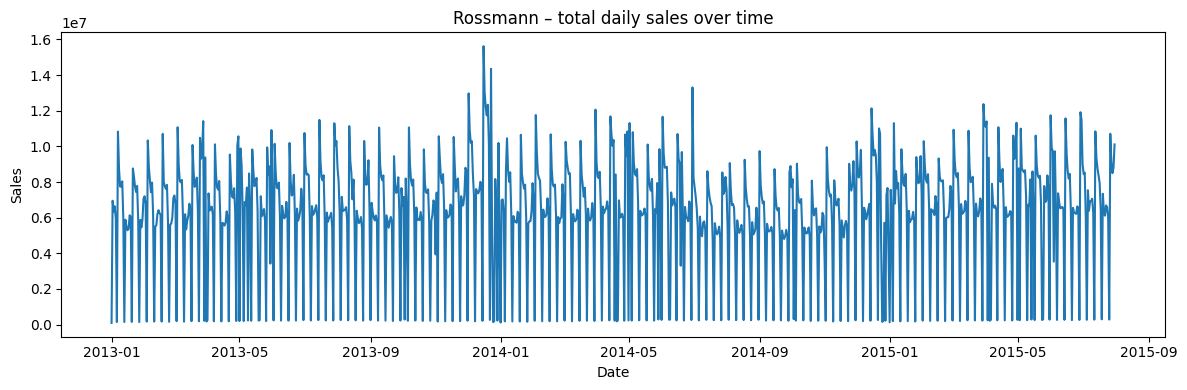

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(daily["Date"], daily["Sales"])
plt.title("Rossmann – total daily sales over time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()


/tmp/ipython-input-2821492049.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2821492049.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


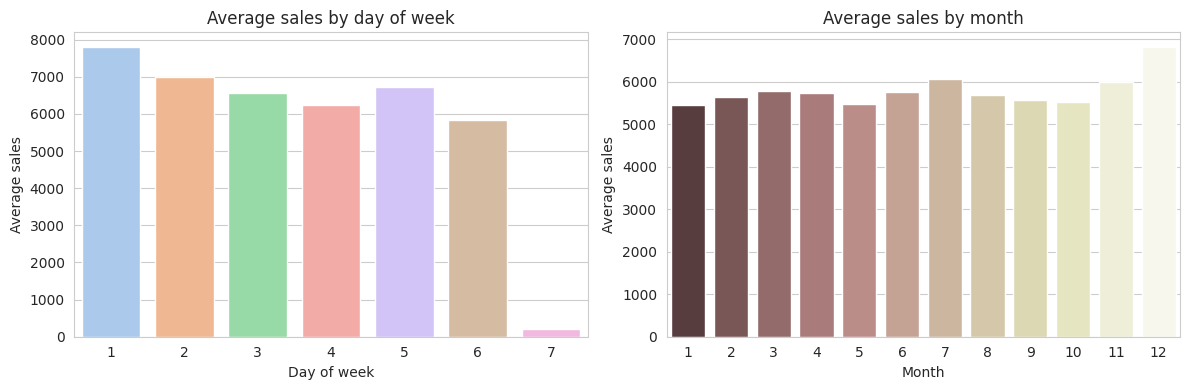

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

df["DayOfWeek"] = df["DayOfWeek"].astype(int)
df["Month"] = df["Date"].dt.month

dow_sales = df.groupby("DayOfWeek")["Sales"].mean()
month_sales = df.groupby("Month")["Sales"].mean()

plt.figure(figsize=(12,4))

# Day of week
plt.subplot(1,2,1)
sns.barplot(
    x=dow_sales.index,
    y=dow_sales.values,
    palette="pastel"
)
plt.title("Average sales by day of week")
plt.xlabel("Day of week")
plt.ylabel("Average sales")

# Month
plt.subplot(1,2,2)
sns.barplot(
    x=month_sales.index,
    y=month_sales.values,
    palette="pink"
)
plt.title("Average sales by month")
plt.xlabel("Month")
plt.ylabel("Average sales")

plt.tight_layout()
plt.show()


### 3.2 Неделна сезоналност

/tmp/ipython-input-4209579945.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


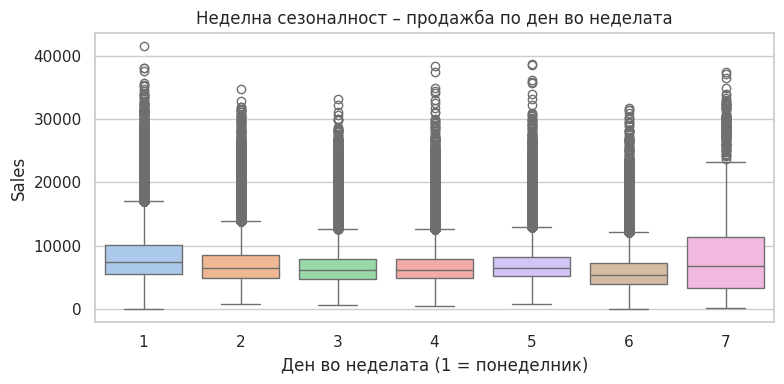

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", palette="pastel")

# make sure we have clean df
df_clean = df[(df["Open"] == 1) & (df["Sales"] > 0)].copy()

plt.figure(figsize=(8,4))
sns.boxplot(
    data=df_clean,
    x="DayOfWeek",
    y="Sales",
    palette="pastel"
)
plt.title("Неделна сезоналност – продажба по ден во неделата")
plt.xlabel("Ден во неделата (1 = понеделник)")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()


### 3.3 Влијание на промоции

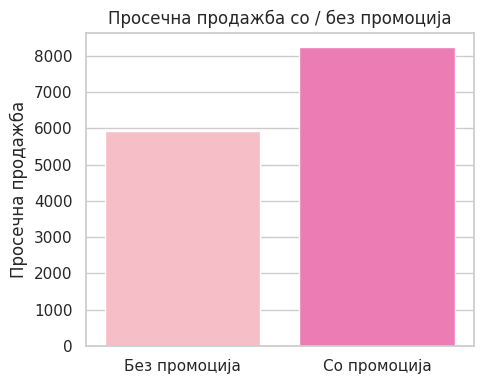

In [ ]:
promo_sales = df_clean.groupby("Promo")["Sales"].mean().reset_index()

plt.figure(figsize=(5,4))
sns.barplot(
    data=promo_sales,
    x="Promo",
    y="Sales",
    hue="Promo",
    dodge=False,
    legend=False,
    palette=["#ffb6c1", "#ff69b4"]  # light/darker pink
)
plt.xticks([0,1], ["Без промоција", "Со промоција"])
plt.title("Просечна продажба со / без промоција")
plt.xlabel("")
plt.ylabel("Просечна продажба")
plt.tight_layout()
plt.show()


### 3.4 Влијание на празници (StateHoliday / SchoolHoliday)


In [ ]:
holiday_map = {
    "0": "Нема празник",
    0:   "Нема празник",
    "a": "Јавен празник",
    "b": "Велигден",
    "c": "Божиќ"
}
df_clean["StateHolidayLabel"] = df_clean["StateHoliday"].map(holiday_map)


/tmp/ipython-input-3247927684.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


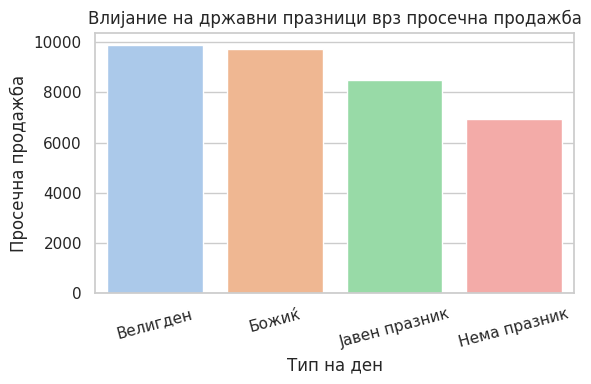

In [ ]:
holiday_sales = (
    df_clean.groupby("StateHolidayLabel")["Sales"]
            .mean()
            .reset_index()
            .sort_values("Sales", ascending=False)
)

plt.figure(figsize=(6,4))
sns.barplot(
    data=holiday_sales,
    x="StateHolidayLabel",
    y="Sales",
    palette="pastel"
)
plt.title("Влијание на државни празници врз просечна продажба")
plt.xlabel("Тип на ден")
plt.ylabel("Просечна продажба")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


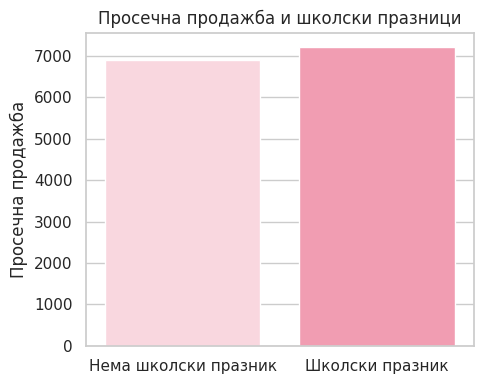

In [ ]:
school_sales = df_clean.groupby("SchoolHoliday")["Sales"].mean().reset_index()

plt.figure(figsize=(5,4))
sns.barplot(
    data=school_sales,
    x="SchoolHoliday",
    y="Sales",
    hue="SchoolHoliday",
    dodge=False,
    legend=False,
    palette=["#ffd1dc", "#ff8fab"]
)
plt.xticks([0,1], ["Нема школски празник", "Школски празник"])
plt.title("Просечна продажба и школски празници")
plt.xlabel("")
plt.ylabel("Просечна продажба")
plt.tight_layout()
plt.show()


In [ ]:
# keep only open days with positive sales
df_clean = df[(df["Open"] == 1) & (df["Sales"] > 0)].copy()
df_clean.shape


(844338, 19)

In [ ]:
df_clean["Year"] = df_clean["Date"].dt.year
df_clean["Month"] = df_clean["Date"].dt.month
df_clean["Day"] = df_clean["Date"].dt.day


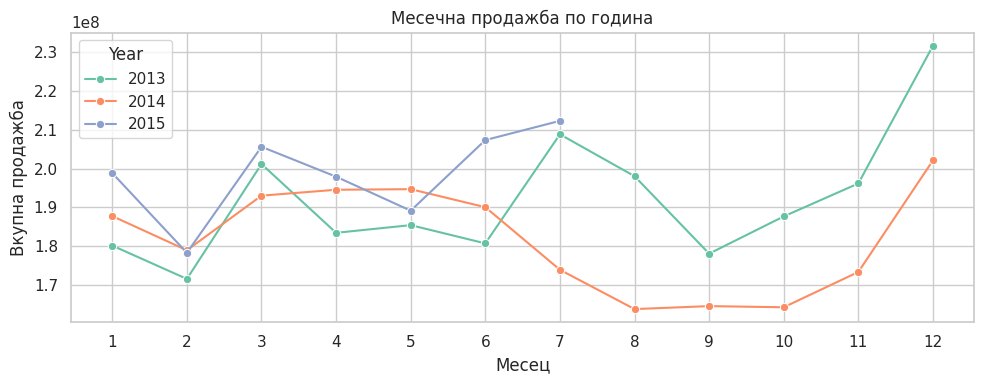

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# set once, before plots
sns.set_theme(style="whitegrid")

monthly = (
    df_clean.groupby(["Year", "Month"])["Sales"]
            .sum()
            .reset_index()
)

plt.figure(figsize=(10,4))

sns.lineplot(
    data=monthly,
    x="Month",
    y="Sales",
    hue="Year",
    marker="o",
    palette="Set2"   # <- palette here
)

plt.title("Месечна продажба по година")
plt.xlabel("Месец")
plt.ylabel("Вкупна продажба")
plt.xticks(range(1,13))
plt.tight_layout()
plt.show()


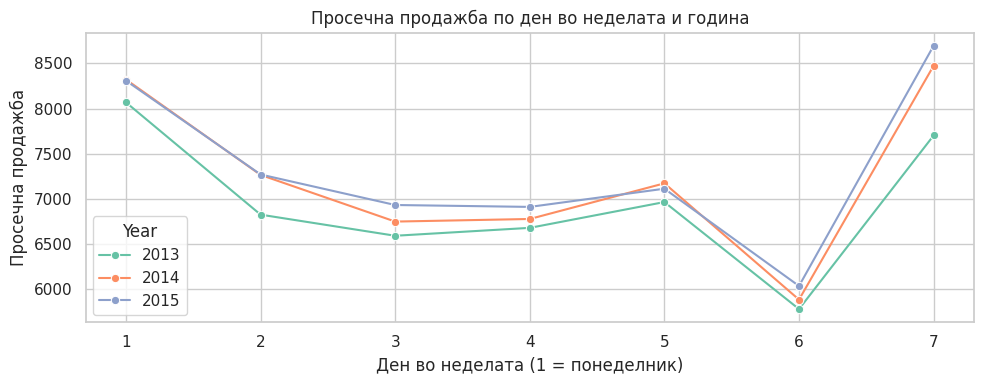

In [ ]:
dow_year = (
    df_clean.groupby(["Year", "DayOfWeek"])["Sales"]
            .mean()
            .reset_index()
)

plt.figure(figsize=(10,4))
sns.lineplot(
    data=dow_year,
    x="DayOfWeek",
    y="Sales",
    hue="Year",
    marker="o",
    palette="Set2"   # or "Set1", "deep", etc.
)
plt.title("Просечна продажба по ден во неделата и година")
plt.xlabel("Ден во неделата (1 = понеделник)")
plt.ylabel("Просечна продажба")
plt.tight_layout()
plt.show()


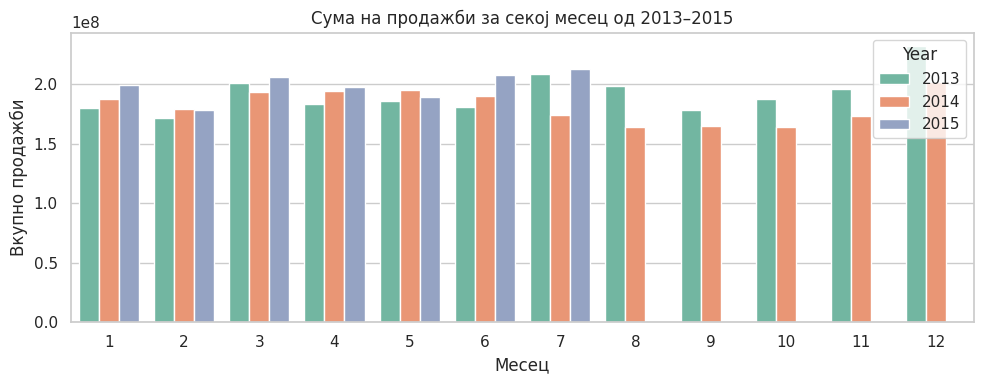

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) make sure we have Year and Month
df_clean["Year"] = df_clean["Date"].dt.year
df_clean["Month"] = df_clean["Date"].dt.month

# 2) aggregate: total sales per month per year
monthly_sum = (
    df_clean.groupby(["Year", "Month"])["Sales"]
            .sum()
            .reset_index()
)

# 3) barplot of sums
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10,4))
sns.barplot(
    data=monthly_sum,
    x="Month",
    y="Sales",
    hue="Year",
    palette="Set2"      # or another palette you like
)
plt.title("Сума на продажби за секој месец од 2013–2015")
plt.xlabel("Месец")
plt.ylabel("Вкупно продажби")
plt.tight_layout()
plt.show()


/tmp/ipython-input-3463721021.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


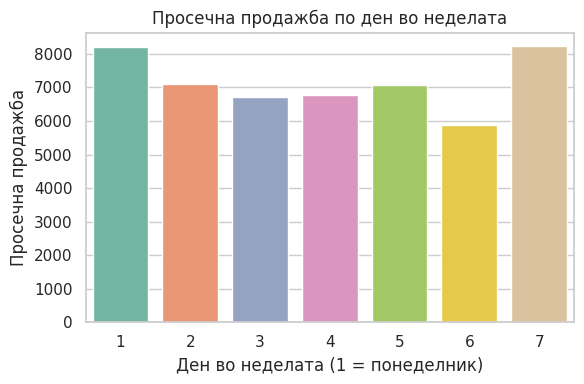

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# make sure DayOfWeek is int and df_clean is defined
df_clean["DayOfWeek"] = df_clean["DayOfWeek"].astype(int)

dow_avg = (
    df_clean.groupby("DayOfWeek")["Sales"]
            .mean()
            .reset_index()
)

sns.set_theme(style="whitegrid")

plt.figure(figsize=(6,4))
sns.barplot(
    data=dow_avg,
    x="DayOfWeek",
    y="Sales",
    palette="Set2"
)
plt.title("Просечна продажба по ден во неделата")
plt.xlabel("Ден во неделата (1 = понеделник)")
plt.ylabel("Просечна продажба")
plt.tight_layout()
plt.show()


## 4. Декомпозиција на временската серија


Со сезонска декомпозиција ја разделуваме серијата на тренд, сезонска компонента и шум. Трендот покажува постепен пораст на вкупната продажба, сезонската компонента го фаќа повторливиот неделен образец, а резидуалите претставуваат нерегуларни шокови (неочекувано високи или ниски денови) кои моделите тешко ги објаснуваат.


In [ ]:
# df_clean: само отворени продавници и Sales > 0

# агрегирање на вкупна дневна продажба
ts = (
    df_clean.groupby("Date", as_index=False)["Sales"]
            .sum()
            .sort_values("Date")
)

ts.head()
ts.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    942 non-null    datetime64[ns]
 1   Sales   942 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 14.8 KB


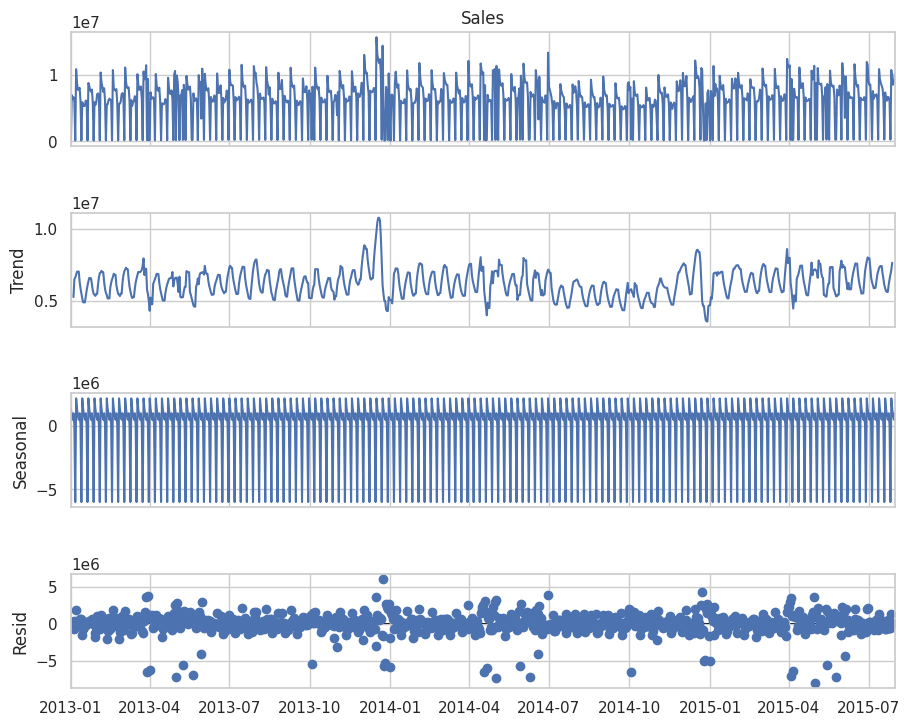

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# осигури се дека ts има Date и Sales и е порастен по датум
ts = ts.sort_values("Date").set_index("Date")

result = seasonal_decompose(
    ts["Sales"],
    model="additive",    # или "multiplicative" ако има силна релативна сезоналност
    period=7             # неделна сезоналност (7 дена)
)

fig = result.plot()
fig.set_size_inches(10, 8)


Со декомпозицијата ја разделуваме серијата на тренд, сезонска компонента и шум. Трендот покажува постепен пораст на вкупната продажба, сезонската компонента ја фаќа неделната шема (одредени денови секогаш се посилни), а резидуалите претставуваат непредвидливи шокови кои моделите е тешко да ги објаснат

## 5. Основни (Baseline) модели

Основните модели служат како референтна точка за споредба со покомплексни методи.
Во оваа секција се применуваат наивен модел и подвижен просек.


In [ ]:
import numpy as np
import pandas as pd

# 1) rebuild ts from df_clean to be sure
ts = (
    df_clean.groupby("Date", as_index=False)["Sales"]
            .sum()
            .sort_values("Date")
)

# 2) baseline split (keeps Date / Sales)
ts = ts.sort_values("Date").reset_index(drop=True)

horizon = 30
train_ts = ts.iloc[:-horizon].copy()
test_ts  = ts.iloc[-horizon:].copy()

y_train = train_ts["Sales"].values
y_test  = test_ts["Sales"].values

# 3) Prophet dataframe (RENAMED COPY, do not overwrite ts)
prophet_df = ts.rename(columns={"Date": "ds", "Sales": "y"})
prophet_train = prophet_df.iloc[:-horizon].copy()
prophet_test  = prophet_df.iloc[-horizon:].copy()




Последните 30 дена ги користиме како тест множество. Моделите се тренираат на претходните денови, а потоа ги споредуваме предвидувањата за тие 30 дена со вистинските вредности

### 5.2 Наивен модел (Naive – вчера = денес)


In [ ]:
full_sales = ts["Sales"].astype(float).values

naive_forecast = np.roll(full_sales, 1)
naive_forecast[0] = np.nan  # now allowed, array is float

naive_test = naive_forecast[-horizon:]


### 5.3 Подвижен просек (Moving Average, прозор 7 дена)

In [ ]:
window = 7
ma_forecast = pd.Series(full_sales).rolling(window).mean().values
ma_test = ma_forecast[-horizon:]


In [ ]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

metrics = {}

metrics["Naive (t-1)"] = {
    "RMSE": rmse(y_test, naive_test),
    "MAE": mae(y_test, naive_test),
    "MAPE": mape(y_test, naive_test),
}

metrics["7-day MA"] = {
    "RMSE": rmse(y_test, ma_test),
    "MAE": mae(y_test, ma_test),
    "MAPE": mape(y_test, ma_test),
}

metrics_df = (
    pd.DataFrame(metrics)
      .T
      .reset_index()
      .rename(columns={"index": "Model"})
)

metrics_df


,Model,RMSE,MAE,MAPE
0,Naive (t-1),4.012268e+06,2.512012e+06,299.610317
1,7-day MA,2.887851e+06,1.975401e+06,318.005316


Наивниот модел има RMSE ≈ 4.0M и MAPE ≈ 300%, додека 7‑дневниот подвижен просек го намалува RMSE и MAE, но има нешто поголем MAPE. Овие резултати покажуваат дека базичните модели имаат голема грешка, па очекуваме пософистицираните модели (на пр. Prophet) да постигнат пониски вредности на овие метрики.

## 6. Класични модели (ARIMA и Prophet)

Класичните модели за временски серии експлицитно ја моделираат тренд и сезоналната компонента.
Се применуваат ARIMA и Prophet модели за предвидување на продажбата.


In [ ]:
from prophet import Prophet

m = Prophet()
m.fit(prophet_train)

future = m.make_future_dataframe(periods=horizon)
forecast = m.predict(future)

prophet_forecast = forecast.iloc[-horizon:]
y_pred_prophet = prophet_forecast["yhat"].values


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


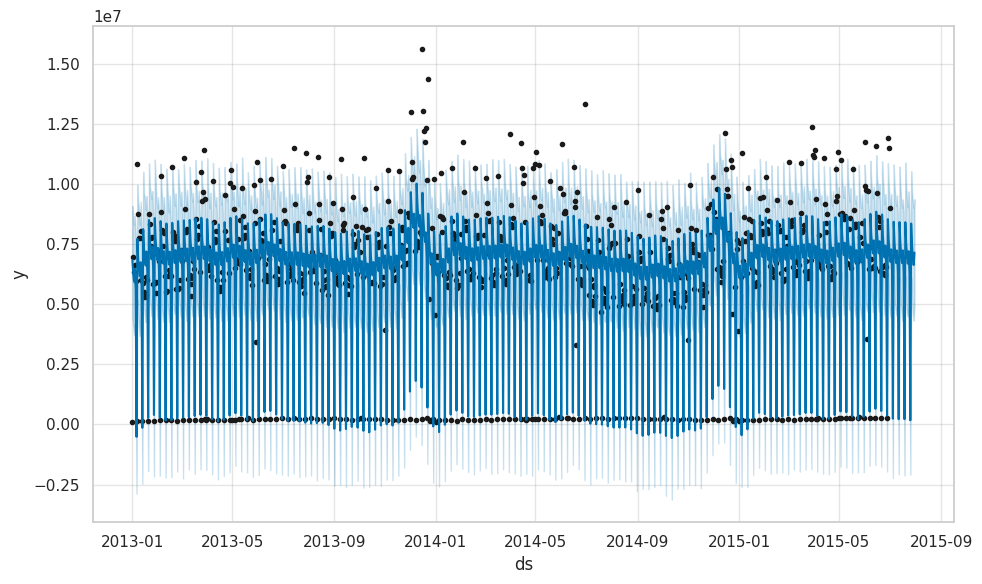

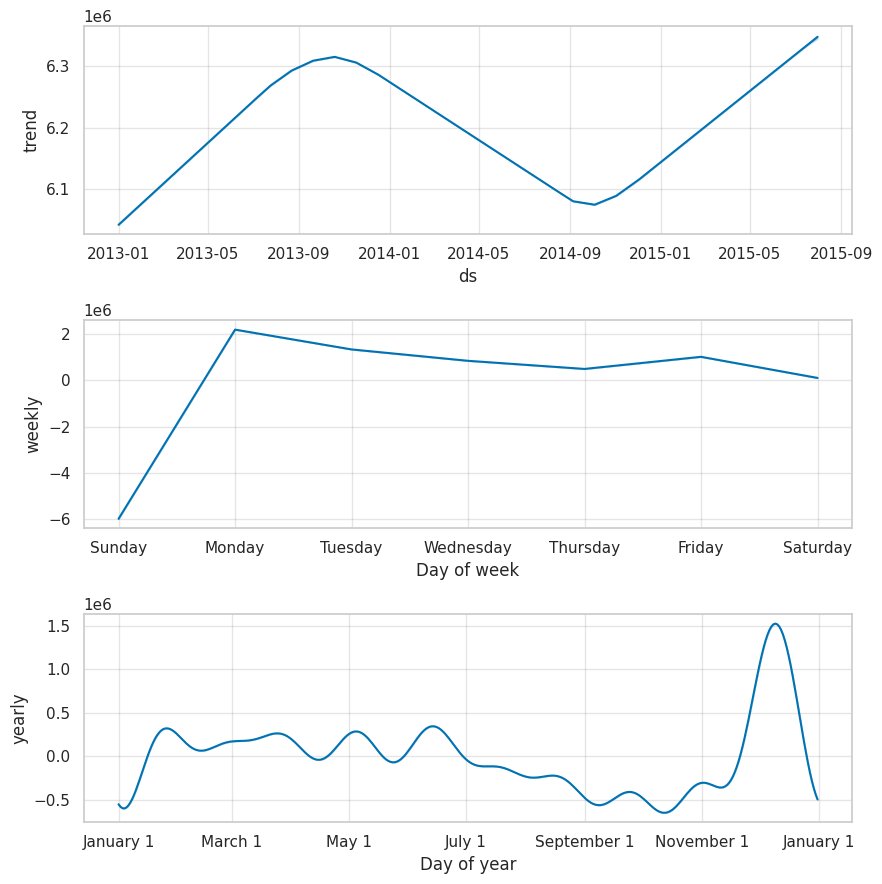

In [ ]:
m.plot(forecast)
m.plot_components(forecast);


In [ ]:
metrics["Prophet"] = {
    "RMSE": rmse(y_test, y_pred_prophet),
    "MAE": mae(y_test, y_pred_prophet),
    "MAPE": mape(y_test, y_pred_prophet),
}

metrics_df = (
    pd.DataFrame(metrics)
      .T
      .reset_index()
      .rename(columns={"index": "Model"})
)

metrics_df


,Model,RMSE,MAE,MAPE
0,Naive (t-1),4.012268e+06,2.512012e+06,299.610317
1,7-day MA,2.887851e+06,1.975401e+06,318.005316
2,Prophet,1.287977e+06,9.748498e+05,14.765638


Базичните модели (наивен и 7‑дневен подвижен просек) имаат многу големи грешки, со MAPE околу 300%, што значи дека во просек промашуваат за неколкукратник од реалната продажба. Prophet драматично ја намалува грешката (RMSE ≈ 1.29M, MAE ≈ 0.97M, MAPE ≈ 14.8%), што покажува дека експлицитното моделирање на тренд и сезоналност води до многу попрактични и употребливи предвидувања.

## 7. Машинско учење

Моделите од машинско учење не ја земаат предвид временската зависност директно.
Затоа се користат лагирани карактеристики за претставување на историските вредности.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# start from ts with Date and Sales
df_ml = ts.copy()
df_ml["day_of_week"] = df_ml["Date"].dt.weekday  # 0=Mon
df_ml["month"] = df_ml["Date"].dt.month

# lag features
df_ml["lag_1"] = df_ml["Sales"].shift(1)
df_ml["lag_7"] = df_ml["Sales"].shift(7)

# drop first rows with NaNs in lags
df_ml = df_ml.dropna().reset_index(drop=True)

features = ["day_of_week", "month", "lag_1", "lag_7"]
target = "Sales"

# align horizon with previous split: last 30 days as test
horizon = 30
train_ml = df_ml.iloc[:-horizon].copy()
test_ml  = df_ml.iloc[-horizon:].copy()

X_train = train_ml[features]
y_train_ml = train_ml[target]
X_test  = test_ml[features]
y_test_ml = test_ml[target]


In [ ]:
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train_ml)
y_pred_rf = rf.predict(X_test)


In [ ]:
metrics["RandomForest"] = {
    "RMSE": rmse(y_test_ml.values, y_pred_rf),
    "MAE": mae(y_test_ml.values, y_pred_rf),
    "MAPE": mape(y_test_ml.values, y_pred_rf),
}

metrics_df = (
    pd.DataFrame(metrics)
      .T
      .reset_index()
      .rename(columns={"index": "Model"})
)

metrics_df


,Model,RMSE,MAE,MAPE
0,Naive (t-1),4.012268e+06,2.512012e+06,299.610317
1,7-day MA,2.887851e+06,1.975401e+06,318.005316
2,Prophet,1.287977e+06,9.748498e+05,14.765638
3,RandomForest,8.589571e+05,5.601488e+05,8.648143


Моделот на машинско учење (Random Forest со lag) постигна најниска грешка и најдобар MAPE (~8.6%), што значи дека во просек промашува помалку од 10% од реалната продажба на дневно ниво

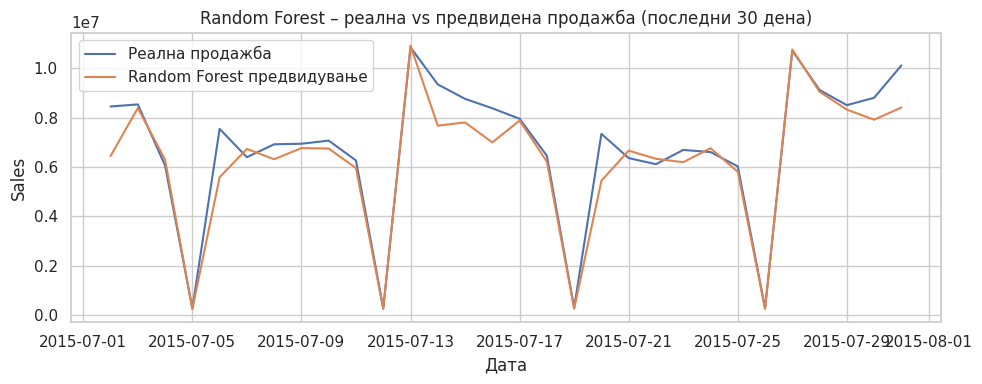

In [ ]:
import matplotlib.pyplot as plt

rf_plot = test_ml[["Date"]].copy()
rf_plot["Actual"] = y_test_ml.values
rf_plot["Predicted"] = y_pred_rf

plt.figure(figsize=(10,4))
plt.plot(rf_plot["Date"], rf_plot["Actual"], label="Реална продажба")
plt.plot(rf_plot["Date"], rf_plot["Predicted"], label="Random Forest предвидување")
plt.title("Random Forest – реална vs предвидена продажба (последни 30 дена)")
plt.xlabel("Дата")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()


## 8. Евалуација и споредба на моделите

Перформансите на моделите се оценуваат со помош на RMSE, MAE и MAPE метрики.
Резултатите се користат за споредба на точноста и стабилноста на различните пристапи.


In [ ]:
import pandas as pd
import numpy as np

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

metrics = {}

# базични модели (веќе ги имаш naive_test, ma_test, y_test)
metrics["Naive (t-1)"] = {
    "RMSE": rmse(y_test, naive_test),
    "MAE": mae(y_test, naive_test),
    "MAPE": mape(y_test, naive_test),
}

metrics["7-day MA"] = {
    "RMSE": rmse(y_test, ma_test),
    "MAE": mae(y_test, ma_test),
    "MAPE": mape(y_test, ma_test),
}

# Prophet (y_pred_prophet против истиот y_test)
metrics["Prophet"] = {
    "RMSE": rmse(y_test, y_pred_prophet),
    "MAE": mae(y_test, y_pred_prophet),
    "MAPE": mape(y_test, y_pred_prophet),
}

# Random Forest (y_test_ml, y_pred_rf)
metrics["RandomForest"] = {
    "RMSE": rmse(y_test_ml.values, y_pred_rf),
    "MAE": mae(y_test_ml.values, y_pred_rf),
    "MAPE": mape(y_test_ml.values, y_pred_rf),
}

metrics_df = (
    pd.DataFrame(metrics)
      .T
      .reset_index()
      .rename(columns={"index": "Model"})
)

metrics_df


,Model,RMSE,MAE,MAPE
0,Naive (t-1),4.012268e+06,2.512012e+06,299.610317
1,7-day MA,2.887851e+06,1.975401e+06,318.005316
2,Prophet,1.287977e+06,9.748498e+05,14.765638
3,RandomForest,8.589571e+05,5.601488e+05,8.648143


In [ ]:
compare = test_ts[["Date"]].copy()
compare["Actual"] = y_test
compare["Naive"] = naive_test
compare["MA_7"] = ma_test
compare["Prophet"] = y_pred_prophet
compare = compare.reset_index(drop=True)


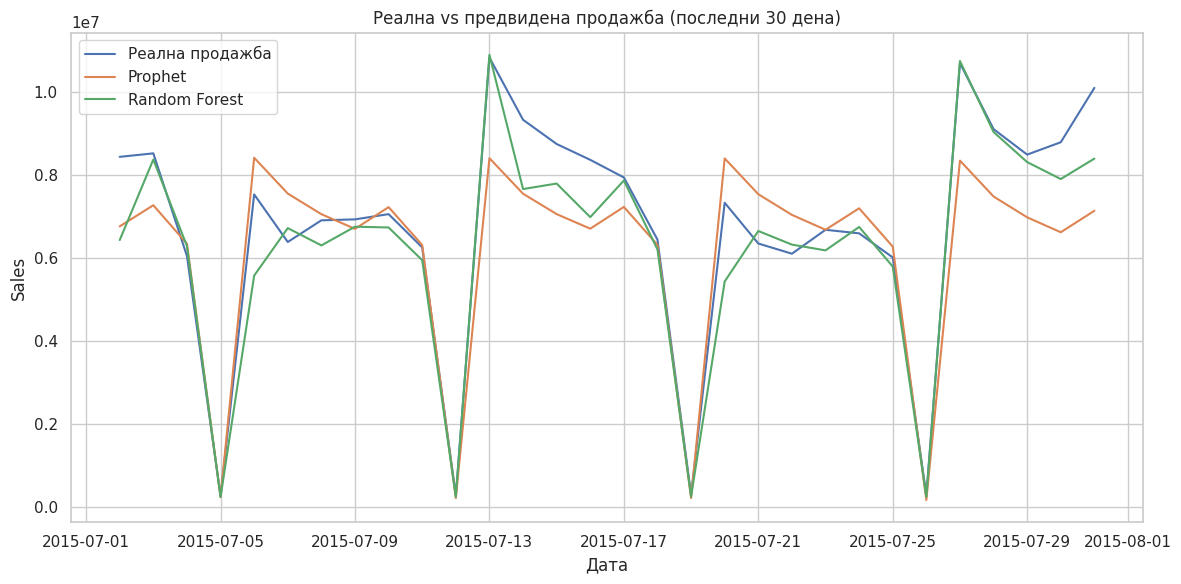

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(compare["Date"], compare["Actual"], label="Реална продажба")
plt.plot(compare["Date"], compare["Prophet"], label="Prophet")
plt.plot(test_ml["Date"], y_pred_rf, label="Random Forest")
plt.title("Реална vs предвидена продажба (последни 30 дена)")
plt.xlabel("Дата")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()


## 9. Заклучок



На Rossmann множеството ги споредивме основните модели (наивен и подвижен просек), класичниот модел Prophet и моделот од машинско учење Random Forest со лагирани и календарски карактеристики. Резултатите покажуваат дека Prophet значително ги надминува базичните модели, но Random Forest постигнува најниска грешка (MAPE ≈ 8.6%), па во рамки на овој проект го сметаме за најуспешен модел за предвидување на вкупната дневна продажба на Rossmann. Во пракса, изборот на модел зависи од потребниот баланс помеѓу интерпретабилност (каде Prophet има предност) и максимална точност (каде Random Forest и други ML модели се покажуваат подобри).